# Credit Card Fraud Detection

# 4. Features

## Inputs / Features

    1. Time -Number of seconds elapsed between this transaction and the first transaction in the dataset
    
     may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
    2. V1
    3. V2
    4. V3
    5. V4
    6. V5
    7. V6
    8. V7
    9. V8
    10. V9
    11. V10
    12. V11
    13. V12
    14. V13
    15. V14
    16. V15
    17. V16
    18. V17
    19. V18
    20. V19
    21. V20
    22. V21
    23. V22
    24. V23
    25. V24
    26. V25
    27. V26
    28. V27
    29. V28
    30. Amount - Transaction amount
    
## Output / Label
    31. Class1 for fraudulent transactions, 0 otherwise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Text(0, 0.5, 'Frequency')

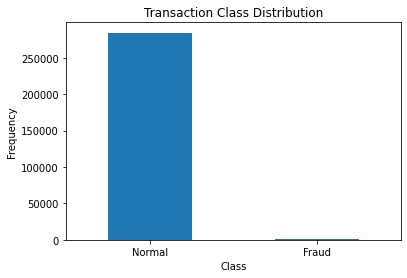

In [4]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [8]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [13]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [14]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [15]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
282084,170643.0,-0.513035,1.588590,-0.315327,3.215408,1.101571,-0.377689,0.936047,0.245024,-1.906095,0.892176,-1.479236,-0.579995,-0.734827,0.777403,-1.624470,0.153412,-0.177476,-0.556451,-1.105617,-0.354584,0.235993,0.483079,0.101931,1.119802,-1.005809,-0.190188,-0.028427,0.195387,10.65,0
217003,140724.0,2.052141,-0.152083,-1.093007,0.421538,-0.226477,-1.159381,0.083787,-0.236712,0.733189,0.102199,-0.908253,-0.220054,-1.215880,0.535076,0.227417,-0.103904,-0.158764,-0.801972,0.082789,-0.312060,-0.297944,-0.780066,0.362093,-0.048148,-0.356691,0.205318,-0.075936,-0.063205,1.98,0
163319,115848.0,-0.935602,0.921283,0.763320,0.821401,0.871227,0.584041,0.840123,0.185507,-0.711876,-0.721229,0.642025,-0.335462,-0.918843,-0.798319,0.226182,0.275768,0.516931,1.327636,0.919857,0.090190,-0.029156,-0.154689,-0.360464,0.150339,0.647455,-0.427112,-0.027072,0.119150,92.45,0
197423,132008.0,2.057468,-1.283770,-0.703883,-0.898889,-1.122555,-0.448688,-1.035074,-0.083111,0.255541,0.752630,-1.455736,-1.065043,-0.131891,-0.385809,0.696795,1.614357,-0.236935,-0.645728,0.516036,0.122319,0.393191,0.988101,-0.012009,-0.628095,-0.158187,-0.031725,-0.003152,-0.039081,90.00,0
192288,129624.0,-1.502534,-1.588719,-0.842557,-0.887508,2.660843,-0.146116,0.484404,0.115437,-2.331476,0.474980,0.555261,-0.103417,-0.404218,1.066011,-0.031189,-3.146715,0.854688,0.377649,-0.411955,0.214356,0.260526,0.675566,0.107076,-1.578787,0.511075,1.278860,-0.050942,0.103535,152.39,0


In [16]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

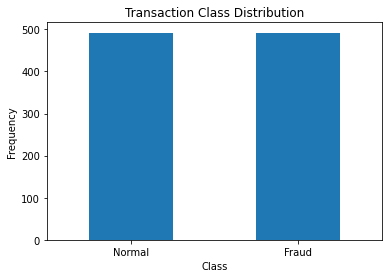

In [17]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(new_dataset['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,96087.221545,0.048794,0.053983,0.010007,0.044424,-0.056473,-0.131113,0.049163,0.052982,0.066960,-0.032386,0.042228,-0.051969,-0.067293,0.046683,-0.032776,0.084250,0.023791,0.064424,-0.047505,0.047280,0.035859,0.041547,-0.014194,-0.012103,0.024481,0.050089,0.006740,0.009373,92.945122
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Splitting the data into Features & Targets

In [19]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [20]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
282084  170643.0 -0.513035  1.588590 -0.315327  3.215408  1.101571 -0.377689   
217003  140724.0  2.052141 -0.152083 -1.093007  0.421538 -0.226477 -1.159381   
163319  115848.0 -0.935602  0.921283  0.763320  0.821401  0.871227  0.584041   
197423  132008.0  2.057468 -1.283770 -0.703883 -0.898889 -1.122555 -0.448688   
192288  129624.0 -1.502534 -1.588719 -0.842557 -0.887508  2.660843 -0.146116   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9   

In [21]:
print(Y)

282084    0
217003    0
163319    0
197423    0
192288    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


### Split the data into Training data & Testing Data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


### Model Training

#### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train, Y_train)

LogisticRegression()

In [28]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9440914866581956


In [30]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9187817258883249


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        99
           1       0.96      0.88      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9187817258883249
----------------------------------------------------------------------------------------------------



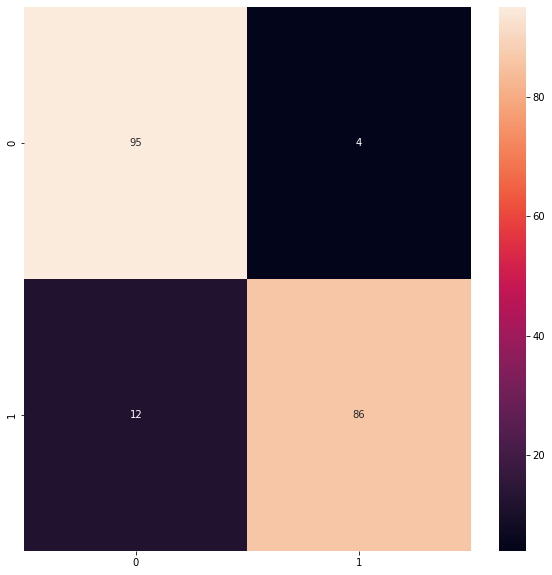

In [40]:
## prediction
pred = model.predict(X_test)

print('Classification Report: \n', classification_report(Y_test, pred))
print("-" * 100)
print()
print('Accuracy Score: ', accuracy_score(Y_test, pred))
print("-" * 100)
print()
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test, pred), annot=True, fmt='g');

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
rf = RandomForestClassifier()

## fit on training data
rf.fit(X_train, Y_train)

RandomForestClassifier()

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92        99
           1       0.96      0.88      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9187817258883249
----------------------------------------------------------------------------------------------------



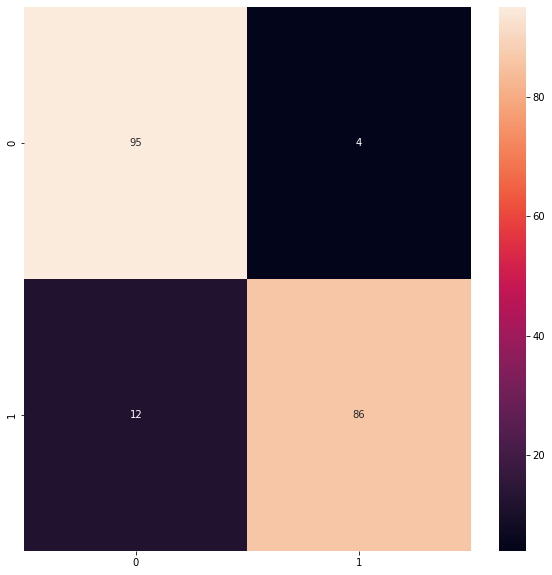

In [38]:
pred = rf.predict(X_test)


print('Classification Report: \n', classification_report(Y_test, pred))
print("-" * 100)
print()
print('Accuracy Score: ', accuracy_score(Y_test, pred))
print("-" * 100)
print()
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test, pred), annot=True, fmt='g');